# Traning YOLOv5 to detect t-shirts of Olympique de Marseille (OM) and Paris Saint-Germain (PSG)

## About YOLO

YOLO (you only look once) is an object detection model proposed by [Redmon et al. in 2015](https://pjreddie.com/media/files/papers/yolo_1.pdf). From your first version, the YOLO architecture had modifications in your backbone and, the way to predict the bounding box coordinates. Nowadays the YOLO family counts with five different versions, the first three versions proposed by Redmon [YOLOv1](https://pjreddie.com/media/files/papers/yolo_1.pdf), [YOLO9000](https://arxiv.org/pdf/1612.08242.pdf) and [YOLOv3](https://arxiv.org/pdf/1804.02767.pdf). The YOLOv4 was proposed by  [Alexey Bochkovskiy et al.](https://arxiv.org/pdf/2004.10934.pdf) The Yolov5 was proposed by Glenn Jocher, there's no article for this version, but the repository with the version, [here](https://github.com/ultralytics/yolov5).

YOLO is an unified model, it means, the model considers one single Convolutional Neural Network  to detect objects and classify them. Before YOLO, the models of object detection were built in two steps, first the detection of all possibles bounding boxes and then, the classification. These models as Faster R-CNN are very accurate, on the other hand, very slow. The representation of YOLO model can be seen in the follow image.
![OM x PSG T-Shirt Recognition!](images/yolo.jpg "OM x PSG")

The image come from the first [YOLO paper](https://pjreddie.com/media/files/papers/yolo_1.pdf). As we can see, YOLO considers the image as a grid cell. Each cell on the grid has two functions, predict a class and, if the center of the object is in the cell, predict all possibles bounding boxes. The detection of the object and class is a regression problem in this model, the predictions of bounding boxes and class are made in the fully-connected layers.

From the [second version](https://arxiv.org/pdf/1612.08242.pdf), YOLO changed the way to calculate the bounding boxes, YOLO considers anchors boxes using k-means, removing the fully-connected layers. The class prediction and objectness are calculated according with each anchor box. To calculate the bounding boxes, we have

$b_x = \sigma(t_x) + c_x$

$b_y = \sigma(t_y) + c_y$

$b_w = p_we^\left(t_w\right)$

$b_h = p_he^\left(t_h\right)$.

The network predicts 5 coordinates $t_x$, $t_y$, $t_w$ and $t_h$, over the condition if the cell is offset from the top left corner of the image by $(c_x, c_y)$ and if, the bound box has width $p_w$ and height $p_h$. The term $\sigma$ represents the sigmoid function. Above an illustration from the [paper](https://arxiv.org/pdf/1612.08242.pdf).
![BOX!](images/boxes.png)

The [third version](https://arxiv.org/pdf/1804.02767.pdf) of YOLO considers a new backbone for the model, using the DarkNet-56 (until YOLOv4 the DarkNet framework was considered), implementing residuals layers. The model also makes predictions across scales, considering grids of cells of different sizes, to take care about small, medium and larger objects. The output of the model is a tensor with four coordinates for the box, the objectness and the class predictions.

The [fourth version](https://arxiv.org/pdf/1612.08242.pdf) of YOLO  are influenced by state of art models as BoF (bag of freebies) and BoS (bag of specials). The BoF improve the accuracy of the detector. The BoS increase a bit the inference cost, it can significantly improve the object detection metrics.

The [last version](https://github.com/ultralytics/yolov5) of YOLO is different from the previous versions. The model was developed using PyTorch, different to others versions that use DarkNet framework. The model, as YOLOv4, considers [CSP backbone](https://openaccess.thecvf.com/content_CVPRW_2020/papers/w28/Wang_CSPNet_A_New_Backbone_That_Can_Enhance_Learning_Capability_of_CVPRW_2020_paper.pdf) and [PA-NET](https://arxiv.org/pdf/1803.01534.pdf) at the neck of the network (segmetation). Additionally, the model introduces mosaic data augmentation and auto learning bounding box anchors.

This project considers the last version of YOLO. Why? To experiment the model. Before, I've trained on DarkNet framework, using YOLOv3, the results are good, the YOLO models are fast and accurate. Using the YOLOv5 the training process is directly, with few line commands. You can easily have access to train script and know about all parameters. In addition, the output model is lightweight.

## Dataset

The dataset for this model is composed by $320$ images of each team. The annotations was made with LabelImg. Even if the model resizes the images along the training process, before start it, all images was resized into $(640x640)$, conserving the aspect ratio.

**Class balance**

Among the $640$ image, we have $920$ annotated t-shirt. For the OM, we have $457$ instances and for the PSG $472$.

**Background images**

Additionally, we consider $64$ image as background, $10\%$ of the dataset. The background images do not contain objects to be predicted.

If you want to train the model, you must select the images from the original [dataset](https://github.com/IgorMeloS/OMxPSG-T-Shirt-Detection/tree/main/dataset). For the labeling, you can use any tool of your preference, but remember to save the annotations into YOLO format.

## Importing Torch

In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.cuda.empty_cache() # doesn’t increase the amount of GPU memory available for PyTorch.

## Small YOLO v5 architecture

YOLOv5 has some size of architecture, for this experimental project, we run the model with the small architecture composed by $24$ convolutional layers and the detection layer. The reason to use this model is due the time running and limitation of GPU memory. More lager models give better results. In the the next cells, we can see the model architecture and learning parameters.

In [4]:
%cat yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [5]:
%cat yolov5/data/hyps/hyp.scratch.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license
# Hyperparameters for COCO training from scratch
# python train.py --batch 40 --cfg yolov5m.yaml --weights '' --data coco.yaml --img 640 --epochs 300
# See tutorials for hyperparameter evolution https://github.com/ultralytics/yolov5#tutorials

lr0: 0.01  # initial learning rate (SGD=1E-2, Adam=1E-3)
lrf: 0.1  # final OneCycleLR learning rate (lr0 * lrf)
momentum: 0.937  # SGD momentum/Adam beta1
weight_decay: 0.0005  # optimizer weight decay 5e-4
warmup_epochs: 3.0  # warmup epochs (fractions ok)
warmup_momentum: 0.8  # warmup initial momentum
warmup_bias_lr: 0.1  # warmup initial bias lr
box: 0.05  # box loss gain
cls: 0.5  # cls loss gain
cls_pw: 1.0  # cls BCELoss positive_weight
obj: 1.0  # obj loss gain (scale with pixels)
obj_pw: 1.0  # obj BCELoss positive_weight
iou_t: 0.20  # IoU training threshold
anchor_t: 4.0  # anchor-multiple threshold
# anchors: 3  # anchors per output layer (0 to ignore)
fl_gamma: 0.0  # focal loss gamma (effic

## Training process

To train the YOLOv5, first of all, you must download the model from [GitHub] and install the requirements.

The train script found in the yolov5 folder requires some arguments. 

- --img (input image size)
- --batch (batch size)
- --epochs (number of epochs)
- --data (file in yaml format with the dataset directory, name and number of classes)
- --project (directory to save the model)
- --workers (number of data loaders)

It's recommended to check the train script to know all possible arguments. The model was trained over $150$ epochs. The batch size is $16$ due to a limitation of GPU memory, but if you can increase, it's better.

The data.yaml file must be allocated inside the yolov5 folder, this contains the follow informations

train: ../dataset/train/images
val: ../dataset/valid/images

nc: 2
names: ['OM', 'PSG']

The annotations file must be allocatted in the follow maner ../dataset/train/labels.

Other arguments can be passed, for example, if you want to store to save check-points you can pass --save-period, the artifact will be saved on the [Wandb](https://wandb.ai/home) platform. During the training process you can follow the metrics curve evolution with Wandb, but it's optional.

The training set is composed by $495$ images (including background, the validation set is composed by $220$ images.

In [6]:
!cd yolov5 && python train.py --img 640 --batch 16 --epochs 150 --data data.yaml --project ../results --weights yolov5s.pt --workers 1

wandb: Currently logged in as: igor_ms (use `wandb login --relogin` to force relogin)
train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=150, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=1, project=../results, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 135, done.
remote: Counting objects: 100% (135/135), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 135 (delta 89), reused 134 (delta 89), pack-reused 0
Receiving objects: 100% (135/135), 23.35 KiB | 4.67 MiB/s, done.
Resolving deltas: 100% (89/89), completed with 1 local object.
From https://github.com/u


     Epoch   gpu_mem       box       obj       cls    labels  img_size
    31/149     3.23G   0.04175   0.01395  0.003791        35       640: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        220        299      0.681      0.803      0.842      0.493

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    32/149     3.23G   0.03857   0.01493  0.003583        33       640: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        220        299      0.699      0.924       0.86      0.525

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    33/149     3.23G   0.03919   0.01509  0.002545        36       640: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        220        299      0.785      0.851      0.884      0.521

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
    82/149     3.23G   0.02334   0.01112  0.001121        49       640: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        220        299      0.899      0.907      0.942      0.676

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    83/149     3.23G   0.02247   0.00975 0.0005152        36       640: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        220        299      0.897      0.904       0.94      0.655

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    84/149     3.23G   0.02229   0.01015 0.0008787        41       640: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        220        299      0.908      0.884       0.94      0.653

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   133/149     3.23G   0.01611  0.008324 0.0002287        51       640: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        220        299       0.92       0.89      0.948      0.688

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   134/149     3.23G   0.01563   0.00785 0.0005172        55       640: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        220        299       0.91      0.892      0.946       0.68

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   135/149     3.23G   0.01547  0.008663 0.0006582        42       640: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        220        299      0.902        0.9      0.947      0.682

     Epoch   gpu_mem       box      

## Results

At the end of the training process, the will be saved into the results folder. There are some outputs, as a csv file with the metrics evolution, images with some plots, as confusion matrix, for example.

When we lead with object detection, we seek to get the best results for the mAP_0.5 and mAP_0.5:0.95 metrics. To measure this metrics, we take account two other metrics, precision and recall. Beyond these metrics, when we work with YOLO, it's important to see the evolution of the loss function for the Box predictions, Objectness and Class predictions. Now, we present these results.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
results = pd.read_csv('results/exp/results.csv')

In [9]:
results.columns

Index(['               epoch', '      train/box_loss', '      train/obj_loss',
       '      train/cls_loss', '   metrics/precision', '      metrics/recall',
       '     metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', '        val/box_loss',
       '        val/obj_loss', '        val/cls_loss', '               x/lr0',
       '               x/lr1', '               x/lr2'],
      dtype='object')

### Loss Functions

To get more details how these functions are calculated, [see](https://pjreddie.com/media/files/papers/yolo_1.pdf).

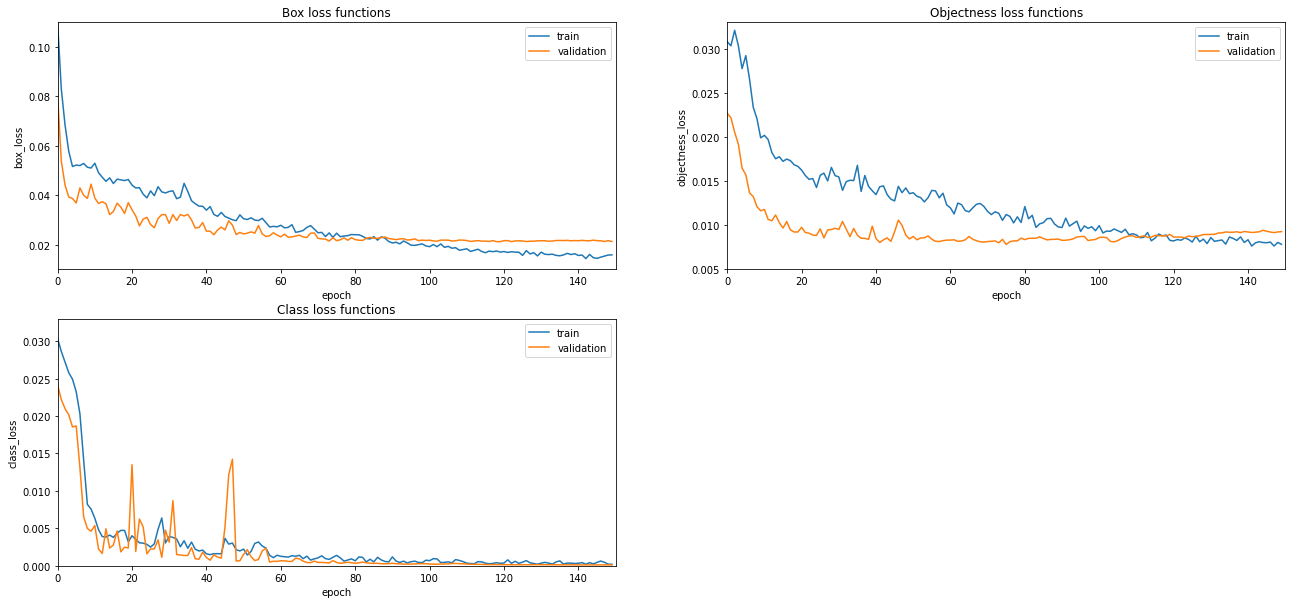

In [10]:
plt.figure(figsize=(22,10))
plt.subplot(2,2,1)
plt.plot(results['      train/box_loss'], label = 'train')
plt.plot(results['        val/box_loss'], label = 'validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('box_loss')
plt.title('Box loss functions')
plt.axis((0, 150, 0.01,0.11))
plt.subplot(2,2,2)
plt.plot(results['      train/obj_loss'], label = 'train')
plt.plot(results['        val/obj_loss'], label = 'validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('objectness_loss')
plt.axis((0, 150, 0.005,0.033))
plt.title('Objectness loss functions')
plt.subplot(2,2,3)
plt.plot(results['      train/cls_loss'], label = 'train')
plt.plot(results['        val/cls_loss'], label = 'validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('class_loss')
plt.axis((0, 150, 0.00,0.033))
plt.title('Class loss functions')
plt.savefig("Loss functions.jpg")
plt.show()

### mAP_0.5 and m_AP_0.5:0.95

About the metrics, there's this [blog](https://blog.paperspace.com/mean-average-precision/) that explains perfectly. So, I passthrough.

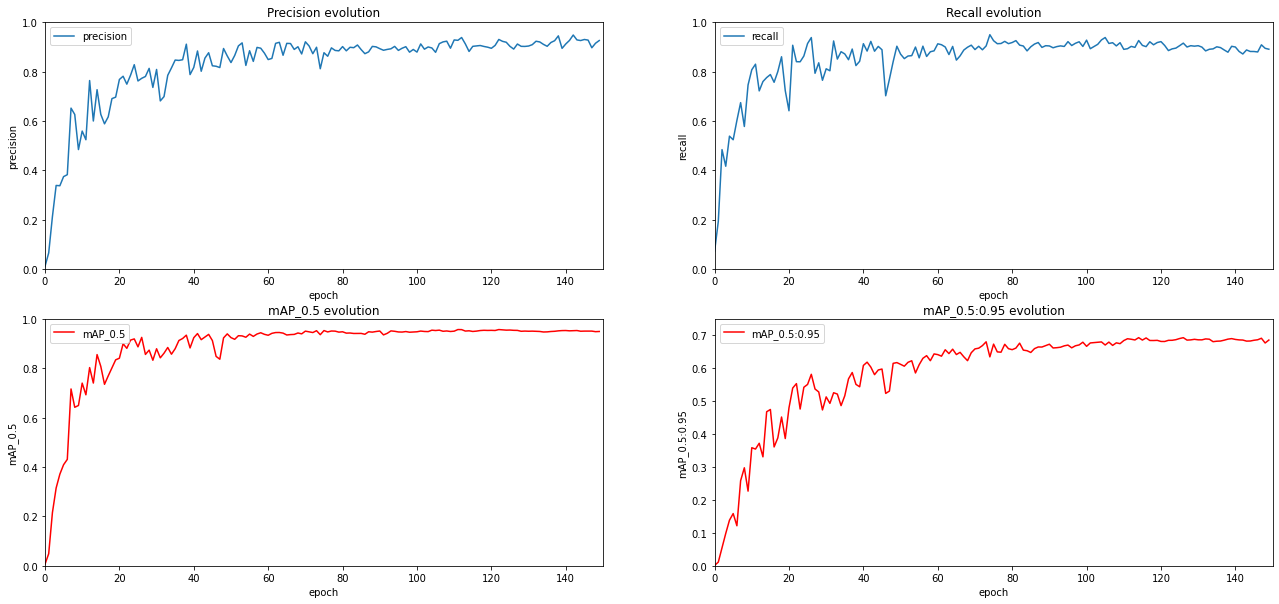

In [11]:
plt.figure(figsize=(22,10))
plt.subplot(2,2,1)
plt.plot(results['   metrics/precision'], label = 'precision')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('precision')
plt.axis((0, 150, 0.0, 1))
plt.title('Precision evolution')
plt.subplot(2,2,2)
plt.plot(results['      metrics/recall'], label = 'recall')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('recall')
plt.axis((0, 150, 0.0, 1))
plt.title('Recall evolution')
plt.subplot(2,2,3)
plt.plot(results['     metrics/mAP_0.5'], label = 'mAP_0.5', color = 'red')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('mAP_0.5')
plt.axis((0, 150, 0.00,1))
plt.title('mAP_0.5 evolution')
plt.subplot(2,2,4)
plt.plot(results['metrics/mAP_0.5:0.95'], label = 'mAP_0.5:0.95', color = 'red')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('mAP_0.5:0.95')
plt.axis((0, 150, 0.00,0.75))
plt.title('mAP_0.5:0.95 evolution')
plt.savefig('metrics.jpg')
plt.show()

## Conclusions

The experience with YOLOv5 was agreeable in terms of results. Firstly, we don't have a large dataset and, we don't have many instances by class, even so, the model shows good results.

Looking the loss function results, we can see that our curves are closely. Even if, the results for the Box loss show a difference between the training and validation, the gap among these curves is not enough large to be considered in over-fitting, the same analysis for the Objectness loss. The curves for the class prediction loss show the same behavior, indicating that the model was able to generalize the predictions.

The mAP_0.5 result at the end of training was $0.948$, a good value, indicating that IoU (Intersection over Union) between ground truth and the predict object give a high score. The evolution of mAP_0.5:0.95 also presents good performance.

The model was trained using the weights from YOLOv5, to improve the results, we must grab more images and use a more larger architecture. The test of this model can be found [here](https://github.com/IgorMeloS/OMxPSG-T-Shirt-Detection/blob/main/OMxPSG_YOLO/testing.ipynb).